In [17]:
import pandas as pd
food_df = pd.read_csv("../dataset/food_preprocessed.csv")
food_df_clean = food_df[(food_df["人均消费"] <= 1000) & (food_df["点评数"] >= 50)]
food_df_clean

,Unnamed: 0,类别,行政区,点评数,口味,环境,服务,人均消费
0,0,烧烤,K,176.0,8.0,8.6,7.9,124.0
1,2,粤菜,K,141.0,6.7,7.2,6.6,141.0
2,3,海鲜,K,76.0,7.2,7.2,7.3,148.0
3,4,烧烤,K,600.0,7.2,7.6,7.0,143.0
4,5,本菜,J,69.0,8.2,8.9,8.4,66.0
...,...,...,...,...,...,...,...,...
40551,96361,浙菜,N,457.0,9.1,7.7,8.8,62.0
40555,96371,浙菜,N,92.0,6.9,6.6,6.6,80.0
40557,96381,浙菜,N,169.0,7.7,7.0,7.4,76.0
40559,96387,亚菜,K,216.0,7.0,7.1,7.1,49.0


In [16]:
food_df_clean.size

840

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import json

model_maps = {}

for i in food_df_clean.groupby("行政区"):
  dt_id, dt_df = i
  for j in dt_df.groupby("类别"):
    classification, df = j
    features = food_df_clean[["环境", "口味", "服务", "人均消费"]]
    x, y = features.iloc[:, 0:-1], features.iloc[:, -1]
    model = KMeans(n_clusters=3)
    model.fit(x)
    model_maps[dt_id + "," + classification] = model.cluster_centers_
    print(model.score(x))

print(model_maps)

-9217.246845365604
-9217.971993885792
-9217.208131609463
-9218.208425177048
-9217.971993885792
-9217.810745708632
-9217.976341795467
-9217.97199388579
-9217.810745708632
-9217.8206935347
-9218.224164025898
-9217.152413531137
-9217.971993885792
-9217.36530002104
-9218.208425177048
-9218.224164025898
-9217.208131609463
-9217.810745708632
-9217.208131609463
-9217.810745708632
-9217.810745708632
-9217.208131609463
-9217.976341795467
-9218.224164025898
-9218.224164025898
-9217.152413531137
-9217.810745708632
-9218.208425177048
-9217.971993885792
-9217.152413531137
-9217.971993885792
-9217.32611487099
-9217.810745708632
-9218.224164025898
-9217.152413531137
-9217.81028268821
-9217.152413531137
-9217.810745708632
-9217.810745708632
-9217.152413531137
-9217.97199388579
-9217.971993885792
-9218.208425177048
-9217.976341795467
-9218.208425177048
-9217.384781683668
-9217.711750207996
-9217.36530002104
-9217.97199388579
-9217.32611487099
-9218.208425177048
-9217.152413531137
-9217.976341795467
-92

In [13]:
for k in model_maps:
  model_maps[k] = list(map(list, model_maps[k]))
with open("data.json", mode="w", encoding="utf-8") as f:
  f.write(json.dumps(model_maps, ensure_ascii=False));

/var/folders/4g/07ztg67547d1j1fngtz2g9m40000gn/T/ipykernel_24656/1800337401.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="PCA", y='人均消费', data=df, palette="Set2")


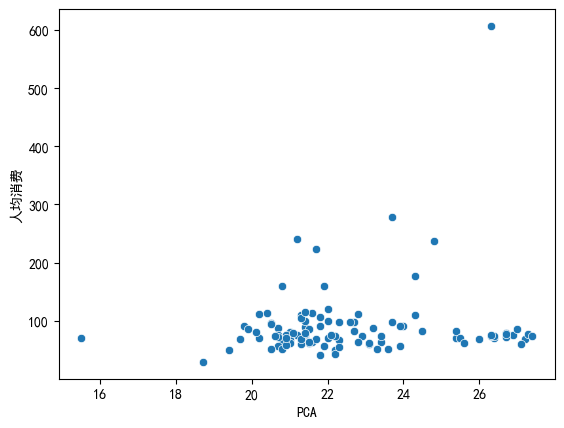

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# food_df_clean = food_df_clean[food_df_clean["人均消费"] < 300]
# food_df_clean = food_df_clean[food_df_clean["点评数"] > 50]
food_df_clean = food_df_clean[food_df_clean["行政区"] == "N"]
food_df_clean = food_df_clean[food_df_clean["类别"] == "浙菜"]

features = food_df_clean[["环境", "口味", "服务", "人均消费"]]
x, y = features.iloc[:, 0:-1], features.iloc[:, -1]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
#pca 降维
a = x.apply(lambda row: row.sum(), axis=1)
pca = PCA(n_components=1)
reduced_features = pca.fit_transform(x)
df = pd.DataFrame({
    "PCA": a,
    "人均消费": y})
# kmeans = KMeans(n_clusters=3, random_state=42)
# food_df_clean["Cluster"] = kmeans.fit_predict(scaled_features)


plt.rcParams["font.sans-serif"] = ["SimHei"]
sns.scatterplot(x="PCA", y='人均消费', data=df, palette="Set2")
plt.show()
